# The Sticker Album Challange (Part 2)

## Boosting Performance with vectorized NumPy code


In [77]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline 

## 1. Getting startet...one simulation

 ### 1.1 Toy example

In [78]:
dice_pages = 6
throws = 6

In [79]:
np.random.seed(42)
v = np.random.randint(1,dice_pages+1,throws)
v

array([4, 5, 3, 5, 5, 2])

#### Solution with np.unique()

In [80]:
np.unique(v)

array([2, 3, 4, 5])

In [81]:
unique = len(np.unique(v))
unique

4

In [82]:
np.random.seed(42)
m = np.random.randint(1,dice_pages+1,10*throws).reshape(10,6)
m

array([[4, 5, 3, 5, 5, 2],
       [3, 3, 3, 5, 4, 3],
       [6, 5, 2, 4, 6, 6],
       [2, 4, 5, 1, 4, 2],
       [6, 5, 4, 1, 1, 3],
       [3, 2, 4, 4, 6, 6],
       [6, 3, 4, 4, 1, 3],
       [5, 3, 5, 1, 2, 4],
       [1, 4, 6, 2, 2, 1],
       [2, 5, 2, 4, 4, 4]])

In [83]:
np.unique(m)

array([1, 2, 3, 4, 5, 6])

#### Alternative Solution - 1 Dimension (One Simulation)

In [84]:
np.random.seed(42)
v = np.random.randint(1,dice_pages+1,throws)
v = np.sort(v)

In [85]:
v

array([2, 3, 4, 5, 5, 5])

In [86]:
v[1:]

array([3, 4, 5, 5, 5])

In [87]:
v[:-1]

array([2, 3, 4, 5, 5])

In [88]:
(v[1:] != v[:-1])

array([ True,  True,  True, False, False])

In [89]:
unique = np.sum((v[1:] != v[:-1]))+1
unique

4

In [90]:
np.random.seed(42)
v = np.random.randint(1,dice_pages+1,12)
v = np.sort(v)
v

array([2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5])

In [91]:
v[1:]

array([3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5])

In [92]:
v[:-1]

array([2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5])

In [93]:
(v[1:] != v[:-1])

array([ True, False, False, False, False,  True, False,  True, False,
       False, False])

In [94]:
unique = np.sum((v[1:] != v[:-1]))+1
unique

4

### 1.2 Sticker Album Challange

In [95]:
album_capacity = 600
purchased_stickers = 800
seed = 123

In [96]:
np.random.seed(seed)
v = np.random.randint(1,album_capacity+1,purchased_stickers)
v.shape

(800,)

In [97]:
v = np.sort(v)
v

array([  1,   1,   2,   2,   3,   4,   4,   5,   7,   7,   7,   9,   9,
         9,  11,  11,  11,  12,  13,  15,  15,  15,  15,  15,  17,  17,
        17,  17,  18,  18,  18,  18,  20,  21,  22,  23,  23,  23,  24,
        24,  25,  26,  27,  28,  28,  30,  30,  30,  31,  33,  33,  33,
        33,  35,  38,  38,  39,  39,  40,  40,  40,  42,  45,  47,  47,
        48,  48,  50,  50,  50,  52,  53,  54,  55,  57,  57,  58,  59,
        60,  61,  61,  61,  62,  63,  63,  64,  64,  65,  65,  66,  68,
        69,  70,  71,  71,  72,  72,  72,  74,  74,  75,  76,  77,  77,
        78,  78,  80,  81,  82,  82,  83,  83,  84,  87,  88,  88,  89,
        89,  90,  90,  91,  92,  93,  93,  93,  94,  94,  95,  95,  97,
        99, 100, 100, 100, 101, 101, 102, 102, 105, 106, 107, 107, 107,
       107, 108, 109, 110, 112, 112, 112, 112, 113, 113, 113, 114, 114,
       114, 115, 116, 116, 117, 118, 119, 122, 123, 123, 124, 124, 126,
       126, 127, 127, 127, 127, 127, 128, 128, 129, 130, 131, 13

In [98]:
unique = np.sum((v[1:] != v[:-1]))+1
unique

439

In [99]:
len(set(v))

439

## 2. Many Simulations

### 2.1 Toy example

In [100]:
import numpy as np

In [101]:
dice_pages = 6
throws = 6
sims = 10
seed = 42

In [102]:
np.random.seed(seed)
m = np.random.randint(1,dice_pages+1,sims*throws).reshape(sims,throws)
m

array([[4, 5, 3, 5, 5, 2],
       [3, 3, 3, 5, 4, 3],
       [6, 5, 2, 4, 6, 6],
       [2, 4, 5, 1, 4, 2],
       [6, 5, 4, 1, 1, 3],
       [3, 2, 4, 4, 6, 6],
       [6, 3, 4, 4, 1, 3],
       [5, 3, 5, 1, 2, 4],
       [1, 4, 6, 2, 2, 1],
       [2, 5, 2, 4, 4, 4]])

In [103]:
m = np.sort(m, axis = 1)
m

array([[2, 3, 4, 5, 5, 5],
       [3, 3, 3, 3, 4, 5],
       [2, 4, 5, 6, 6, 6],
       [1, 2, 2, 4, 4, 5],
       [1, 1, 3, 4, 5, 6],
       [2, 3, 4, 4, 6, 6],
       [1, 3, 3, 4, 4, 6],
       [1, 2, 3, 4, 5, 5],
       [1, 1, 2, 2, 4, 6],
       [2, 2, 4, 4, 4, 5]])

In [104]:
m[:,1:]

array([[3, 4, 5, 5, 5],
       [3, 3, 3, 4, 5],
       [4, 5, 6, 6, 6],
       [2, 2, 4, 4, 5],
       [1, 3, 4, 5, 6],
       [3, 4, 4, 6, 6],
       [3, 3, 4, 4, 6],
       [2, 3, 4, 5, 5],
       [1, 2, 2, 4, 6],
       [2, 4, 4, 4, 5]])

In [105]:
m[:,:-1]

array([[2, 3, 4, 5, 5],
       [3, 3, 3, 3, 4],
       [2, 4, 5, 6, 6],
       [1, 2, 2, 4, 4],
       [1, 1, 3, 4, 5],
       [2, 3, 4, 4, 6],
       [1, 3, 3, 4, 4],
       [1, 2, 3, 4, 5],
       [1, 1, 2, 2, 4],
       [2, 2, 4, 4, 4]])

In [106]:
m[:,1:] != m[:,:-1]

array([[ True,  True,  True, False, False],
       [False, False, False,  True,  True],
       [ True,  True,  True, False, False],
       [ True, False,  True, False,  True],
       [False,  True,  True,  True,  True],
       [ True,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [ True,  True,  True,  True, False],
       [False,  True, False,  True,  True],
       [False,  True, False, False,  True]])

In [107]:
np.sum(m[:,1:] != m[:,:-1], axis = 1) +1 

array([4, 3, 4, 4, 5, 4, 4, 5, 4, 3])

### 2.2 Sticker Album Challange

In [108]:
album_capacity = 600
purchased_stickers = 800
seed = 123
sims = 10000

In [109]:
np.random.seed(seed)
m = np.random.randint(1,album_capacity+1,sims*purchased_stickers).reshape(sims,purchased_stickers)
m = np.sort(m, axis = 1)

In [110]:
m.shape

(10000, 800)

In [111]:
results = np.sum(m[:,1:] != m[:,:-1], axis = 1) +1 
results

array([439, 444, 444, ..., 446, 446, 434])

## 3. Analyzing results and calculating statistics


#### Min

In [112]:
Min = np.min((results))
Min

406

#### Max

In [113]:
Max = np.max(results)
Max

471

#### Mean

In [114]:
Mean = np.mean(results)
Mean

441.9878

#### Median

In [115]:
Median = np.median(results)
Median

442.0

#### Percentiles

In [116]:
percentile = 5
np.percentile(results,percentile)

429.0

#### Prediction Intervals

In [117]:
interval = [5,95]
pred_int = np.percentile(results, interval)
pred_int

array([429., 455.])

#### Visualization

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")

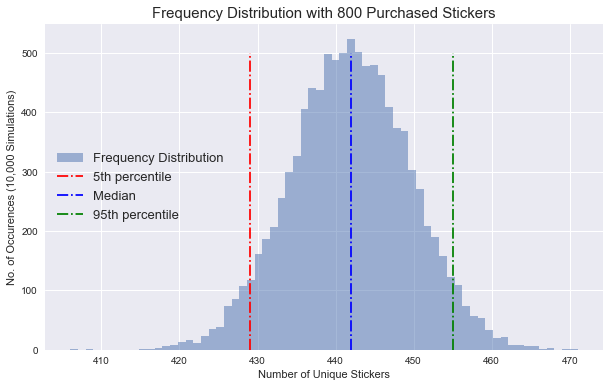

In [119]:
plt.figure(figsize = (10,6))
plt.hist(results, bins = (Max-Min+1), alpha = 0.5, label = "Frequency Distribution")
plt.vlines(pred_int[0], 0, 500, colors = "r", linestyles="dashdot", label = "5th percentile")
plt.vlines(Median, 0, 500, colors = "b", linestyles="dashdot", label = "Median")
plt.vlines(pred_int[1], 0, 500,colors = "g", linestyles="dashdot", label = "95th percentile")
plt.xlabel("Number of Unique Stickers")
plt.ylabel("No. of Occurences (10,000 Simulations)")
plt.title("Frequency Distribution with {} Purchased Stickers".format(purchased_stickers), fontsize = 15)
plt.legend(loc = 6, fontsize = 13)
plt.show()

## 4. Automation by writing a Function


In [120]:
import numpy as np

In [121]:
def StickerAlbum_NP(album_capacity = 600, purchased_stickers = 800, sims = 1000, seed = 123):
    np.random.seed(seed)
    m = np.random.randint(1,album_capacity+1,sims*purchased_stickers).reshape(sims,purchased_stickers)
    m.sort(axis = 1)
    results = np.sum(m[:,1:] != m[:,:-1], axis = 1)+1
    mean= np.mean(results)
    return mean

In [122]:
StickerAlbum_NP(purchased_stickers=1491)

550.174

## 5. Speed Comparison

#### Basic Python

In [123]:
import random

In [124]:
def StickerAlbum(album_capacity = 600, purchased_stickers = 800, sims = 1000, seed = 123):
    results =[]
    random.seed(seed)
    for m in range(sims):
        album = []
        for i in range(purchased_stickers):
            sticker = (random.randint(1,album_capacity))
            if sticker in album:
                pass
            else:
                album.append(sticker)
        length = len(album)
        results.append(length)
    mean =  sum(results)/len(results)
    return mean

In [125]:
%timeit StickerAlbum(sims = 1000, purchased_stickers=1491)

8.71 s ± 345 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Numpy

In [126]:
%timeit StickerAlbum_NP(sims = 1000, purchased_stickers=1491)

76.3 ms ± 6.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Fine Tuning

In [127]:
def StickerAlbum_NP(album_capacity = 600, purchased_stickers = 800, sims = 5000, seed = 123, low_perc = 5, high_perc = 95):
    np.random.seed(seed)
    m = np.random.randint(1,album_capacity+1,sims*purchased_stickers).reshape(sims,purchased_stickers)
    m.sort(axis = 1)
    results = np.sum(m[:,1:] != m[:,:-1], axis = 1)+1
    median = np.round(np.median(results),1)
    low_percetile = np.round(np.percentile(results,low_perc),1)
    high_percentile = np.round(np.percentile(results, high_perc),1)
    return (low_percetile, median, high_percentile )

In [128]:
StickerAlbum_NP(sims = 10000, purchased_stickers=1491, low_perc=5, high_perc=95)

(540.0, 550.0, 560.0)

## 6. Solving advanced Problems / Optimization


### 6.1 Introducing Fair Trading / Perfect Pooling

In [129]:
import numpy as np

#### Toy Example (one Simulation)

In [130]:
album_capacity = 10
purchased_stickers = 7
pool = 3
seed = 42

In [131]:
np.random.seed(seed)
v = np.random.randint(1,album_capacity+1,purchased_stickers*pool)
v.sort()
v

array([ 2,  2,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,  7,  7,  7,  8,  8,
        8,  8,  8, 10])

In [132]:
v[pool:]

array([ 3,  4,  4,  5,  5,  5,  5,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,
       10])

In [133]:
v[:-pool]

array([2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 8])

In [134]:
v[pool:] != v[:-pool]

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True])

In [135]:
(np.sum(v[pool:] != v[:-pool]) + pool) / pool 

6.0

#### Toy Example (many Simulations Simulation)

In [136]:
album_capacity = 10
purchased_stickers = 7
sims = 10
pool = 2
seed = 42

In [137]:
np.random.seed(seed)
m = np.random.randint(1,album_capacity+1,sims*purchased_stickers*pool).reshape(sims, purchased_stickers*pool)
m.sort(axis = 1)
m

array([[ 3,  3,  4,  4,  5,  5,  7,  7,  7,  8,  8,  8,  8, 10],
       [ 1,  1,  2,  2,  3,  5,  5,  6,  6,  6,  8,  9, 10, 10],
       [ 2,  2,  3,  3,  4,  4,  5,  5,  7,  7,  7,  9,  9,  9],
       [ 1,  2,  2,  3,  4,  4,  4,  5,  7,  8,  8,  9, 10, 10],
       [ 2,  2,  2,  4,  4,  6,  6,  6,  7,  8,  9, 10, 10, 10],
       [ 1,  1,  2,  5,  5,  7,  8,  8,  8,  9,  9,  9,  9, 10],
       [ 1,  1,  3,  3,  3,  5,  7,  7,  8,  8,  8,  9, 10, 10],
       [ 1,  1,  2,  3,  3,  3,  5,  6,  7,  7,  8,  8,  8,  9],
       [ 1,  1,  3,  3,  4,  5,  5,  7,  7,  7,  9, 10, 10, 10],
       [ 2,  3,  4,  4,  4,  5,  5,  6,  6,  7,  7,  7,  9, 10]])

In [138]:
results = (np.sum(m[:,pool:] != m[:,:-pool], axis = 1) + pool) / pool
results

array([5.5, 6.5, 6. , 6.5, 5.5, 5.5, 6. , 6. , 6. , 6. ])

#### Sticker Album Challange

In [139]:
def StickerAlbum_NP(pool = 1, album_capacity = 600, purchased_stickers = 800,
                    sims = 5000, seed = 123, low_perc = 5, high_perc = 95):
    np.random.seed(seed)
    m = np.random.randint(1,album_capacity+1,sims*purchased_stickers*pool).reshape(sims,purchased_stickers*pool)
    m.sort(axis = 1)
    results = (np.sum(m[:,pool:] != m[:,:-pool], axis = 1)+pool)/pool
    median = np.round(np.median(results),1)
    low_percetile = np.round(np.percentile(results,low_perc),1)
    high_percentile = np.round(np.percentile(results, high_perc),1)
    return (low_percetile, median, high_percentile )

In [140]:
StickerAlbum_NP(pool = 1, purchased_stickers= 800)

(429.0, 442.0, 455.0)

In [141]:
StickerAlbum_NP(pool = 2, purchased_stickers= 800)

(494.0, 503.0, 511.0)

In [142]:
StickerAlbum_NP(pool = 10, purchased_stickers= 800)

(578.5, 581.5, 584.4)

In [143]:
for i in range(20):
    print(StickerAlbum_NP(purchased_stickers= 550, pool = 100, sims = 50, seed = i))

(543.0, 543.8, 544.7)
(542.6, 543.7, 544.5)
(542.9, 543.9, 544.8)
(542.9, 543.8, 544.6)
(542.8, 543.8, 544.6)
(542.6, 543.9, 544.8)
(542.7, 543.8, 544.6)
(542.9, 543.7, 544.7)
(542.6, 543.8, 544.7)
(543.0, 543.9, 544.6)
(542.8, 543.9, 544.6)
(542.9, 543.7, 544.5)
(542.8, 543.6, 544.6)
(543.0, 543.8, 544.7)
(542.9, 543.7, 544.7)
(543.1, 543.8, 544.5)
(542.8, 543.8, 544.4)
(542.9, 543.8, 544.5)
(542.8, 543.8, 544.7)
(542.7, 543.6, 544.5)


In [144]:
def StickerAlbum_NP(pool = 1, album_capacity = 600, purchased_stickers = 800,
                    sims = 5000, seed = 123, low_perc = 5, high_perc = 95):
    
    sims = int(np.max((np.round(sims/pool, 0), 5)))
   
    np.random.seed(seed)
    m = np.random.randint(1,album_capacity+1,sims*purchased_stickers*pool).reshape(sims,purchased_stickers*pool)
    m.sort(axis = 1)
    results = (np.sum(m[:,pool:] != m[:,:-pool], axis = 1)+pool)/pool
    Median = np.round(np.median(results),1)
    low_percetile = np.round(np.percentile(results,low_perc),1)
    high_percentile = np.round(np.percentile(results, high_perc),1)
    return (low_percetile, Median, high_percentile)
    #return results

In [145]:
StickerAlbum_NP(pool = 100, purchased_stickers=600)

(575.0, 576.0, 576.9)

### 6.2 Visualization

In [146]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

#### Histogramm

In [147]:
pool_1 = StickerAlbum_NP(pool = 1, purchased_stickers= 800, sims = 10000)

In [148]:
len(pool_1)

3

In [149]:
pool = 5
pool_m = StickerAlbum_NP(pool = pool, purchased_stickers= 800, sims = 10000)

In [150]:
len(pool_m)

3

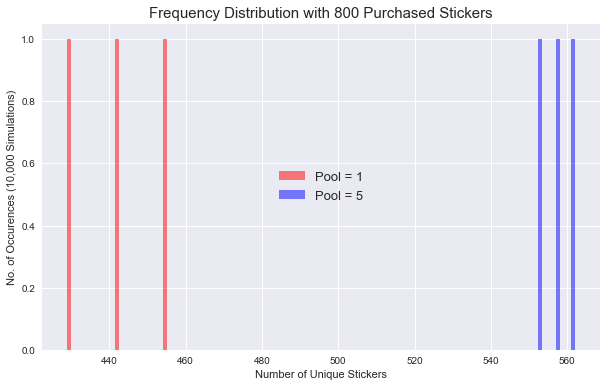

In [155]:
plt.figure(figsize = (10,6))
plt.hist(pool_1, bins = int(max(pool_1)-min(pool_1)+1), alpha = 0.5, color = "r", label = "Pool = 1")
plt.hist(pool_m, bins = int(max(pool_m)-min(pool_m)+1), alpha = 0.5, color = "b", label = "Pool = {}".format(pool))
plt.xlabel("Number of Unique Stickers")
plt.ylabel("No. of Occurences (10,000 Simulations)")
plt.title("Frequency Distribution with 800 Purchased Stickers", fontsize = 15)
plt.legend(loc = "center", fontsize = 13)
plt.show()

#### Line Plot (Purchased Stickers vs. Unique Stickers -Curve)

In [156]:
StickerAlbum_NP(purchased_stickers=1000)

(474.0, 487.0, 499.0)

In [157]:
pools = [1, 2, 3, 5, 10, 100, 10000]

In [158]:
ys = []
xs = np.linspace(1,2000,40).astype("int")

for j in pools:
    y = []
    for x in xs:
        result = StickerAlbum_NP(pool = j, purchased_stickers=x, sims = 50)[1]
        y.append(result)
    ys.append(y)

In [159]:
xs

array([   1,   52,  103,  154,  206,  257,  308,  359,  411,  462,  513,
        564,  616,  667,  718,  769,  821,  872,  923,  974, 1026, 1077,
       1128, 1179, 1231, 1282, 1333, 1384, 1436, 1487, 1538, 1589, 1641,
       1692, 1743, 1794, 1846, 1897, 1948, 2000])

In [160]:
ys

[[1.0,
  50.0,
  94.0,
  136.0,
  175.0,
  210.5,
  241.0,
  270.0,
  297.5,
  323.0,
  345.5,
  366.5,
  387.0,
  403.0,
  417.0,
  434.0,
  446.5,
  458.5,
  472.0,
  481.0,
  493.0,
  499.5,
  508.5,
  516.0,
  523.5,
  530.0,
  537.0,
  541.0,
  545.5,
  549.5,
  553.5,
  558.0,
  561.0,
  564.5,
  567.0,
  570.5,
  572.5,
  574.0,
  576.5,
  579.0],
 [1.0,
  52.0,
  102.0,
  148.5,
  195.0,
  235.5,
  275.0,
  309.0,
  343.0,
  372.0,
  402.0,
  424.0,
  443.5,
  461.5,
  482.0,
  494.5,
  508.0,
  521.0,
  532.0,
  539.5,
  549.5,
  556.0,
  561.0,
  566.5,
  571.0,
  575.5,
  579.0,
  580.5,
  583.5,
  586.0,
  588.0,
  589.0,
  590.0,
  592.5,
  594.0,
  594.5,
  595.0,
  596.0,
  596.0,
  597.0],
 [1.0,
  52.0,
  102.7,
  152.3,
  200.3,
  246.3,
  287.3,
  327.7,
  365.0,
  395.7,
  426.7,
  450.7,
  474.7,
  492.7,
  508.3,
  524.0,
  537.7,
  547.7,
  555.0,
  563.3,
  571.0,
  575.3,
  579.0,
  583.3,
  586.7,
  588.7,
  591.3,
  592.3,
  594.7,
  595.0,
  596.0,
  596.7,


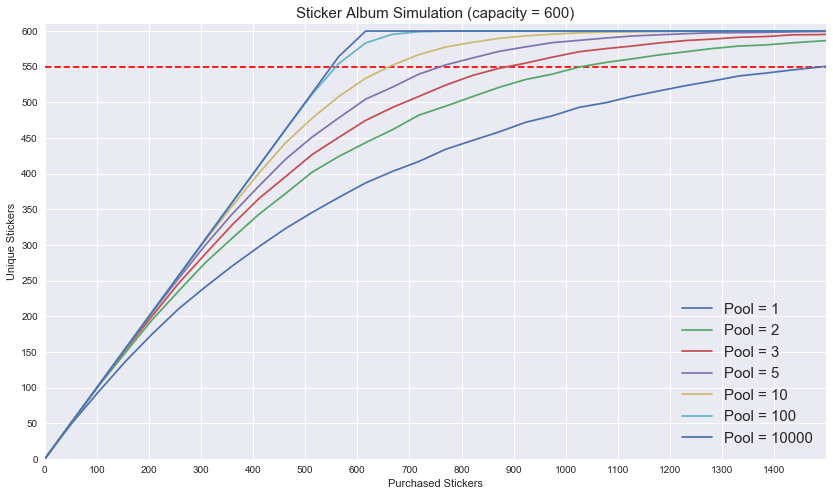

In [161]:
xmin, xmax = 0, 1500
ymin, ymax = 0, 610

plt.figure(figsize = (14,8))
plt.axis((xmin,xmax,ymin,ymax))
plt.xticks(range(xmin,xmax,100))
plt.yticks(range(ymin,ymax,50))
count = 0
for pool in pools:
    plt.plot(xs, ys[count], label = "Pool = {}".format(pool))
    count +=1
plt.hlines(550, xmin, xmax, color = "red", linestyle = "--")
plt.legend(loc = "lower right", fontsize = 15) 
plt.xlabel("Purchased Stickers")
plt.ylabel("Unique Stickers")
plt.title("Sticker Album Simulation (capacity = 600)", fontsize = 15)
plt.show()

### 6.3 Solving / Optimization 

In [162]:
import numpy as np

In [163]:
def StickerAlbum_NP(pool = 1, album_capacity = 600, purchased_stickers = 800,
                    sims = 5000, seed = 123, low_perc = 5, high_perc = 95):
    
    sims = int(np.max((np.round(sims/pool, 0), 5)))
   
    np.random.seed(seed)
    m = np.random.randint(1,album_capacity+1,sims*purchased_stickers*pool).reshape(sims,purchased_stickers*pool)
    m.sort(axis = 1)
    results = (np.sum(m[:,pool:] != m[:,:-pool], axis = 1)+pool)/pool
    Median = np.round(np.median(results),1)
    low_percetile = np.round(np.percentile(results,low_perc),1)
    high_percentile = np.round(np.percentile(results, high_perc),1)
    return (low_percetile, Median, high_percentile)

In [164]:
def optimize(pool = 1, album_capacity = 600, random_start_frac = 0.8, sims = 500, seed = 123, 
             target = 550, learning_rate = 4, epochs = 100, tolerance = 0.5):
    
    random_start = round(album_capacity * random_start_frac)
    
    for _ in range(epochs):
        result = StickerAlbum_NP(pool = pool, album_capacity = album_capacity,
                                 purchased_stickers = int(random_start),
                                 sims = sims, seed = seed,low_perc = 5, high_perc = 95)[1]
        delta = (result-target)
        print(random_start, result)
        if abs(delta)<tolerance:
            break
        else:
            random_start -= round(learning_rate * delta)
    return random_start, result

In [165]:
optimize(pool = 1, album_capacity=600, target = 550) #Base Case, Pool = 1 , moderate part of curve

480 331.0
1356.0 537.0
1408.0 543.0
1436.0 546.0
1452.0 547.0
1464.0 547.0
1476.0 549.0
1480.0 549.0
1484.0 550.0


(1484.0, 550.0)

In [166]:
optimize(pool = 1, album_capacity=600, target = 100, learning_rate= 1) #Pool = 1 , steep part of curve

480 331.0
249.0 204.0
145.0 129.0
116.0 106.0
110.0 101.0
109.0 100.0


(109.0, 100.0)

In [167]:
optimize(pool = 1, album_capacity=600, target = 599, learning_rate=10) #Pool = 1 , flat part of curve

480 331.0
3160.0 597.0
3180.0 597.0
3200.0 597.0
3220.0 597.0
3240.0 598.0
3250.0 597.0
3270.0 598.0
3280.0 598.0
3290.0 598.0
3300.0 598.0
3310.0 598.0
3320.0 598.0
3330.0 598.0
3340.0 598.0
3350.0 598.0
3360.0 598.0
3370.0 598.0
3380.0 598.0
3390.0 598.0
3400.0 598.0
3410.0 598.0
3420.0 598.0
3430.0 598.0
3440.0 598.0
3450.0 598.0
3460.0 598.0
3470.0 598.0
3480.0 598.0
3490.0 599.0


(3490.0, 599.0)

In [168]:
optimize(pool = 10, album_capacity=600, target = 550) #pool = 10, moderate part of curve

480 453.7
865.0 589.2
708.0 563.6
654.0 546.8
667.0 550.7
664.0 549.8


(664.0, 549.8)

In [169]:
optimize(pool = 10, album_capacity=600, target = 100, learning_rate=1) #Pool = 10 , steep part of curve

480 453.7
126.0 126.0
100.0 100.0


(100.0, 100.0)

In [170]:
optimize(pool = 10, album_capacity=600, target = 599) #Pool = 10 , flat part of curve

480 453.7
1061.0 598.3
1064.0 598.2
1067.0 598.3
1070.0 598.3
1073.0 598.3
1076.0 598.4
1078.0 598.4
1080.0 598.4
1082.0 598.4
1084.0 598.4
1086.0 598.5
1088.0 598.5
1090.0 598.6


(1090.0, 598.6)

In [171]:
optimize(pool = 1000, album_capacity=600, target = 550, learning_rate=1) #pool = 1000, moderate(?) part of "curve"

480 480.0
550.0 550.0


(550.0, 550.0)

In [172]:
optimize(pool = 1000, album_capacity=600, target = 100, learning_rate=1) #pool = 1000, steep(?) part of "curve"

480 480.0
100.0 100.0


(100.0, 100.0)

In [173]:
optimize(pool = 1000, album_capacity=600, target = 599, learning_rate=1) #pool = 1000, flat(?) part of "curve"

480 480.0
599.0 591.8
606.0 595.0
610.0 596.2
613.0 596.9
615.0 597.4
617.0 597.7
618.0 597.9
619.0 598.1
620.0 598.3
621.0 598.4
622.0 598.6


(622.0, 598.6)

In [174]:
def optimize(pool = 1, album_capacity = 600, random_start_frac = 0.8, sims = 500, seed = 123, 
             target = 550, learning_rate = 4, epochs = 100, tolerance = 0.5,
             metric = "median", low_perc = 5, high_perc = 95):
    
    if metric == "median":
        index = 1
    elif metric == "low_perc":
        index = 0
    elif metric == "high_perc":
        index = 2
    
    random_start = round(album_capacity * random_start_frac)
    
    for _ in range(epochs):
        result = StickerAlbum_NP(pool = pool, album_capacity = album_capacity,
                                purchased_stickers = int(random_start),
                                sims = sims, seed = seed,low_perc = low_perc, high_perc = high_perc)[index]
        delta = (result-target)
        #print(random_start, result)
        if abs(delta)<tolerance:
            break
        else:
            random_start -= round(learning_rate * delta)
    return random_start, result

In [175]:
#chance of 75% to get at least 550 unique stickers / risk of 25% to get less
optimize(album_capacity=600, target= 550, low_perc= 25, metric= "low_perc", sims = 5000)

(1536.0, 550.0)

In [176]:
StickerAlbum_NP(album_capacity=600, purchased_stickers= 1536, low_perc= 25)

(550.0, 554.0, 563.0)

In [177]:
#chance/risk of 50% to get at least/less than 550 unique stickers
optimize(album_capacity=600, target= 550, metric= "median", sims = 5000)

(1488.0, 550.0)

In [178]:
StickerAlbum_NP(album_capacity=600, purchased_stickers= 1488)

(540.0, 550.0, 560.0)

In [179]:
#chance of 25% to get at least 550 unique stickers / risk of 75% to get less
optimize(album_capacity=600, target= 550, high_perc= 75, metric= "high_perc", sims = 5000)

(1440.0, 550.0)

In [180]:
StickerAlbum_NP(album_capacity=600, high_perc= 75, purchased_stickers= 1440)

(535.0, 546.0, 550.0)

#### Final Case Study 

In [181]:
#no exchange of duplicates with others, no order of the last 50 stickers
optimize(pool = 1, album_capacity= 476, target = 476, metric = "median", learning_rate= 10)

(3131.0, 476.0)

In [182]:
#no exchange of duplicates with others, ordering the last 50 stickers
optimize(pool = 1, album_capacity= 476, target = 426, metric = "median")

(1069.0, 426.0)

In [183]:
#exchange of duplicates with two friends, ordering the last 50 stickers
optimize(pool = 3, album_capacity= 476, target = 426, metric = "median", learning_rate=2)

(654.0, 425.7)

In [184]:
#exchange of duplicates with two friends, ordering the last 50 stickers, first approach: chance of 10%
optimize(pool = 3, album_capacity= 476, target = 426, metric = "high_perc", high_perc= 90, learning_rate= 2)

(638.0, 426.0)